# Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
random_state = 42

## Load Data

In [2]:
# Load Data from Hugging Face: https://huggingface.co/datasets/manueltonneau/english-hate-speech-superset
hf_data_file = "data/en_hf_112024.csv"
hf_df = pd.read_csv(hf_data_file)
hf_df.head()

,text,labels,source,dataset,nb_annotators,post_author_country_location
0,"According to a recent OFSTED report, a school ...",1.0,NGO,CONAN,1,unknown
1,In Birmingham there is a school where girls an...,1.0,NGO,CONAN,1,unknown
2,A school in Birningham is still separating gir...,1.0,NGO,CONAN,1,unknown
3,The police and politicians are covering up the...,1.0,NGO,CONAN,1,unknown
4,Muslims grooming gangs are protected by the go...,1.0,NGO,CONAN,1,unknown


In [3]:
print(f"Number of Rows: {hf_df.shape[0]}, Number of Columns: {hf_df.shape[1]}")

Number of Rows: 360493, Number of Columns: 6


## Data Cleaning

In [4]:
hf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360493 entries, 0 to 360492
Data columns (total 6 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   text                          360492 non-null  object 
 1   labels                        360493 non-null  float64
 2   source                        360493 non-null  object 
 3   dataset                       360493 non-null  object 
 4   nb_annotators                 351306 non-null  object 
 5   post_author_country_location  360493 non-null  object 
dtypes: float64(1), object(5)
memory usage: 16.5+ MB


In [5]:
hf_df['text'] = hf_df['text'].astype('string') # Convert text to string
hf_df['labels'] = hf_df['labels'].astype(int) # Convert labels to int

# Drop NAs
hf_df = hf_df.dropna(axis = 0, subset = ['text', 'labels']).reset_index(drop = True)

# Rename Labels -> Label
hf_df = hf_df.rename(columns = {'labels': 'label'}).reset_index(drop = True)

# Only keep text, label, and source
hf_df = hf_df[['text', 'label', 'source']]

# Drop duplicate text entries
hf_df = hf_df.drop_duplicates(subset=['text'], keep = 'first').reset_index(drop=True)

hf_df.head()

,text,label,source
0,"According to a recent OFSTED report, a school ...",1,NGO
1,In Birmingham there is a school where girls an...,1,NGO
2,A school in Birningham is still separating gir...,1,NGO
3,The police and politicians are covering up the...,1,NGO
4,Muslims grooming gangs are protected by the go...,1,NGO


## Exploratory Statistics

In [6]:
# Print unique values in each column
assert hf_df['text'].nunique() == hf_df.shape[0]

/var/folders/qj/tspvs3x90hg30hgcctblgwfh0000gn/T/ipykernel_7697/2760586597.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.index, y=source_counts.values, palette="viridis")


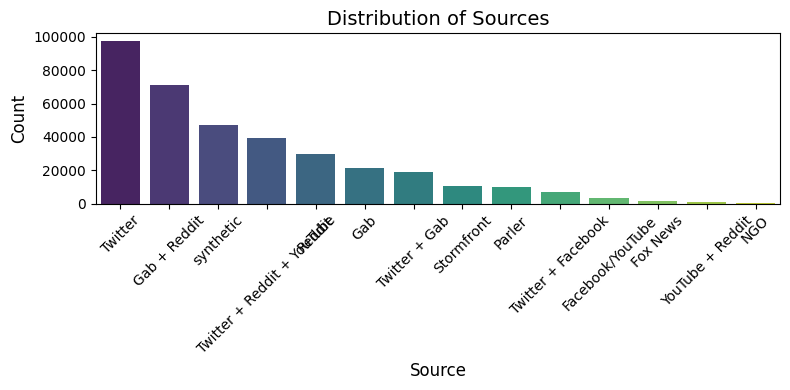

In [7]:
# Compute value counts
source_counts = hf_df['source'].value_counts()

# Create a Seaborn barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=source_counts.index, y=source_counts.values, palette="viridis")

# Add labels and title
plt.xlabel("Source", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Sources", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/qj/tspvs3x90hg30hgcctblgwfh0000gn/T/ipykernel_7697/1667929758.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="mako")


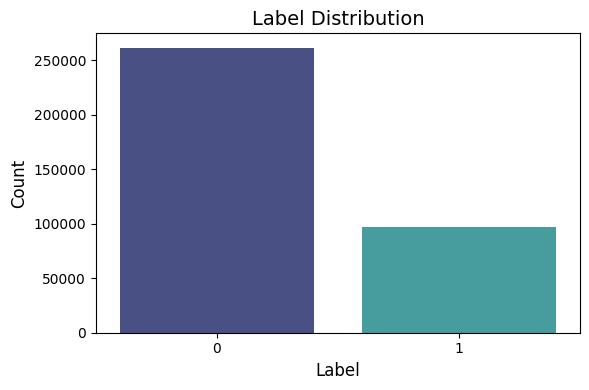

In [8]:
# Compute label counts
label_counts = hf_df['label'].value_counts()

# Create a Seaborn barplot
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="mako")

# Add labels and title
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Label Distribution", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Train-Dev-Test Split

In [9]:
# First split: train (80%) and temp (20%)
train_df, temp_df = train_test_split(hf_df, test_size=0.2, random_state=random_state, shuffle = True, stratify = hf_df['label'])

# Second split: dev (10%) and test (10%)
dev_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=random_state, shuffle = True, stratify = temp_df['label'])

# Reset index for train
train_df = train_df.reset_index(drop = True)

# Reset index for dev
dev_df = dev_df.reset_index(drop = True)

# Reset index for test
test_df = test_df.reset_index(drop = True)

# Check sizes
print(len(train_df), len(dev_df), len(test_df))

286950 35869 35869


In [10]:
train_df.head()

,text,label,source
0,#skynews #bbcnews #itvnews No disrespect mean...,0,Twitter + Reddit + YouTube
1,"Totally agree, May is a vile globalist, dither...",0,Gab
2,"I swear, new bitches here me rap and its a WRA...",0,Twitter
3,She's a suicidally depressed wiccan of all thi...,0,Reddit
4,Nah. I doubt you could be converted.,0,Gab + Reddit


In [11]:
dev_df.head()

,text,label,source
0,">¥ 1,200,000 >Limited (3 left of 5) 14% o...",0,Gab + Reddit
1,I just seen dem 3 white ladies singing wit dem...,0,Twitter + Reddit + YouTube
2,"@USER @USER Na, bet you were being a cunt ove...",1,Twitter
3,", \n \n",0,Twitter + Facebook
4,rt @USER: police controls in madrid now on loc...,0,Twitter


In [12]:
test_df.head()

,text,label,source
0,I'm friends with a lot of black anime fans and...,1,synthetic
1,"Look at these replies, op. You're hitching you...",1,Gab + Reddit
2,If I had a penny for each bright young Black m...,1,synthetic
3,nigga pleaseeee 🙅🏾‍♀️ bitch gon' wack,1,synthetic
4,@USER i just wait for ching chong named doyoun...,0,Twitter


## Save Train-Dev-Test Data to CSV Files

In [13]:
train_df.to_csv("data/training_data_cleaned.csv")
dev_df.to_csv("data/dev_data_cleaned.csv")
test_df.to_csv("data/test_data_cleaned.csv")